In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report 
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Pull in X, Y data
x = pd.read_csv('PreprocX.csv', header=None)

y = pd.read_csv('PreprocY.csv', header=None)
y.drop(0, axis=1, inplace=True)

x_mini = pd.read_csv('PreprocXmini.csv', header=None)

y_mini = pd.read_csv('PreprocYmini.csv', header=None)
y_mini.drop(0, axis=1, inplace=True)

In [3]:
#Check shapes
xshape = x.shape
yshape = y.shape
xmshape = x_mini.shape
ymshape = y_mini.shape
print('DF:    |  Shape:\nx      | {}\ny      | {}\nx_mini | {}\ny_mini | {}'.format(xshape,yshape,xmshape,ymshape))

DF:    |  Shape:
x      | (60448, 37)
y      | (60448, 1)
x_mini | (6045, 37)
y_mini | (6045, 1)


In [4]:
#Create 20% test, 80% train split for param analysis
from sklearn import model_selection

XM_train,XM_test,YM_train,YM_test = model_selection.train_test_split(x_mini,y_mini,
                                                                       test_size = 0.2,
                                                                       random_state = 42)

In [5]:
#Random Forest Param Search
def RF_Param_Search(x_train, y_train, x_test, y_test, 
                    n_upper, mln_upper, n_step = 10, mln_step = 5):
    n_ = []
    mln_ = []
    score_ = []
    scorediff_ = []
    
    for n in range(0, n_upper+1, n_step):
        if n == 0:
            n = 1
        print('n_est: {}'.format(n))
        for mln in range(0, mln_upper+1, mln_step):
            if mln == 0:
                mln = 2
            n_.append(n)
            mln_.append(mln)
            rf_model = RandomForestClassifier(n_estimators = n,
                                              max_leaf_nodes = mln,
                                              n_jobs = -1,
                                              random_state = 42)
            rf_model.fit(x_train, y_train)
            test_score = rf_model.score(x_test, y_test)
            train_score = rf_model.score(x_train, y_train)
            abs_score_diff = np.abs(train_score - test_score)
            scorediff_.append(abs_score_diff) 
            score_.append(test_score)
            print('mln: {} | test scores: {}, diff: {}'.format(mln,score_[-1],scorediff_[-1]))
    
    #Plot RF parameters
    from mpl_toolkits import mplot3d
    from matplotlib import cm
    
    #Set up figure width = 2*height
    fig = plt.figure(figsize = (10,5))
    
    #Left plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_trisurf(n_, mln_, score_, cmap='RdYlGn')
    ax.dist = 13
    plt.xlabel('num estimators')
    plt.ylabel('max leaf nodes')
    plt.title('RF model test score')
    
    #Right plot
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_trisurf(n_, mln_, scorediff_, cmap=cm.coolwarm)
    ax.dist = 13
    plt.xlabel('num estimators')
    plt.ylabel('max leaf nodes')
    plt.title('RF model test/train difference')

n_est: 1
mln: 2 | test scores: 0.6898263027295285, diff: 0.014267990074441683
mln: 10 | test scores: 0.7427626137303557, diff: 0.005583126550868456
mln: 20 | test scores: 0.7692307692307693, diff: 0.0016542597187758634
mln: 30 | test scores: 0.7775020678246485, diff: 0.0018610421836228186
mln: 40 | test scores: 0.7857733664185277, diff: 0.0014474772539289082
mln: 50 | test scores: 0.7882547559966915, diff: 0.00227460711331684
mln: 60 | test scores: 0.7890818858560794, diff: 0.005996691480562477
mln: 70 | test scores: 0.7866004962779156, diff: 0.011373035566583978
mln: 80 | test scores: 0.7899090157154673, diff: 0.015508684863523525
mln: 90 | test scores: 0.7932175351530191, diff: 0.014681555004135594
mln: 100 | test scores: 0.7998345740281224, diff: 0.014681555004135705
mln: 110 | test scores: 0.8172043010752689, diff: 0.02522746071133164
mln: 120 | test scores: 0.8213399503722084, diff: 0.024607113316790774
mln: 130 | test scores: 0.8287841191066998, diff: 0.021298593879238936
mln: 14

mln: 130 | test scores: 0.9280397022332506, diff: 0.018817204301075252
mln: 140 | test scores: 0.9296939619520265, diff: 0.02026468155500416
mln: 150 | test scores: 0.9280397022332506, diff: 0.02336641852770882
mln: 160 | test scores: 0.9288668320926385, diff: 0.024193548387096753
mln: 170 | test scores: 0.9321753515301903, diff: 0.024607113316790663
mln: 180 | test scores: 0.9321753515301903, diff: 0.026468155500413593
mln: 190 | test scores: 0.9321753515301903, diff: 0.027708850289495435
mln: 200 | test scores: 0.9330024813895782, diff: 0.029569892473118253
mln: 210 | test scores: 0.9346567411083541, diff: 0.029156327543424232
mln: 220 | test scores: 0.9371381306865177, diff: 0.027708850289495435
mln: 230 | test scores: 0.9354838709677419, diff: 0.030810587262200206
mln: 240 | test scores: 0.9363110008271298, diff: 0.03370554177005791
mln: 250 | test scores: 0.9346567411083541, diff: 0.03722084367245648
n_est: 10
mln: 2 | test scores: 0.6980976013234078, diff: 0.0031017369727047717
m

mln: 2 | test scores: 0.7105045492142267, diff: 0.011579818031430933
mln: 10 | test scores: 0.7750206782464847, diff: 0.008271298593879206
mln: 20 | test scores: 0.837055417700579, diff: 0.01488833746898266
mln: 30 | test scores: 0.869313482216708, diff: 0.008064516129032251
mln: 40 | test scores: 0.8899917287014061, diff: 0.00496277915632759
mln: 50 | test scores: 0.901571546732837, diff: 0.005583126550868567
mln: 60 | test scores: 0.9090157154673284, diff: 0.0041356492969395475
mln: 70 | test scores: 0.91232423490488, diff: 0.0076509511993383406
mln: 80 | test scores: 0.9148056244830438, diff: 0.008271298593879317
mln: 90 | test scores: 0.9148056244830438, diff: 0.013440860215053752
mln: 100 | test scores: 0.9205955334987593, diff: 0.016129032258064502
mln: 110 | test scores: 0.9222497932175352, diff: 0.018196856906534276
mln: 120 | test scores: 0.9230769230769231, diff: 0.020057899090157094
mln: 130 | test scores: 0.9263854425144747, diff: 0.02212572373862698
mln: 140 | test scores:

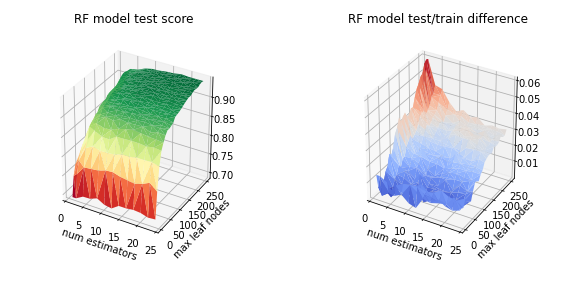

In [6]:
RF_Param_Search(x_train = XM_train, y_train = YM_train,
                x_test = XM_test, y_test = YM_test,
                n_upper = 25, n_step = 2,
                mln_upper = 250, mln_step = 10)

In [7]:
#Set Params
n_est = 20 #lower test train difference at this point
mln = 100 #diminishing returns and local minimum test/train difference

In [8]:
#Sensitivity Analysis
def RF_Sensitivity(x,y,n_est,mln):
    sen_x = []
    sen_y = []
    
    for test_ratio in range(5,100,5):
        X_train,X_test,y_train,y_test = model_selection.train_test_split(x, y,
                                                        test_size=test_ratio/100, 
                                                        random_state=42)
        rf_model = RandomForestClassifier(n_estimators = n_est,
                                          max_leaf_nodes = mln,
                                          n_jobs = -1,
                                          random_state = 42)
        rf_model.fit(X_train, y_train)
        sen_x.append(test_ratio)
        sen_y.append(rf_model.score(X_test,y_test))
        print('{}% test | score: {}'.format(test_ratio,sen_y[-1]))
    plt.plot(sen_x,sen_y)
    plt.xlabel('Test %')
    plt.ylabel('Model Score')
    plt.title('Sensitivity Analysis\n(# est: {}, max leaf nodes: {})'.format(n_est,mln))

5% test | score: 0.9042904290429042
10% test | score: 0.9305785123966942
15% test | score: 0.9228224917309813
20% test | score: 0.9197684036393714
25% test | score: 0.9153439153439153
30% test | score: 0.9051819184123484
35% test | score: 0.9116257088846881
40% test | score: 0.9090157154673284
45% test | score: 0.9066519661889011
50% test | score: 0.901091630830301
55% test | score: 0.9091729323308271
60% test | score: 0.9057071960297767
65% test | score: 0.8974554707379135
70% test | score: 0.8827977315689981
75% test | score: 0.8956771063078959
80% test | score: 0.8966087675765095
85% test | score: 0.8791593695271454
90% test | score: 0.8573791582429701
95% test | score: 0.830228103778513


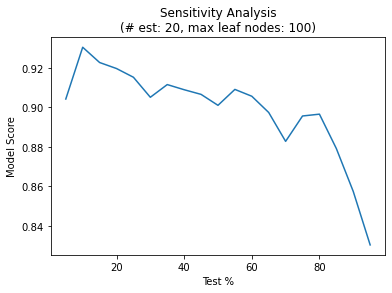

In [9]:
RF_Sensitivity(x = x_mini, y = y_mini,
               n_est = n_est, mln = mln)

In [10]:
#train models
#Set params
n_est = n_est
mln = mln
test_ratio = 0.2

######################################################################
########################## Mini Model ################################
######################################################################
#Split data
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x_mini, y_mini,
                                                                 test_size = test_ratio,
                                                                 random_state = 42)

#Fit model
rf_model_mini = RandomForestClassifier(n_estimators = n_est,
                                  max_leaf_nodes = mln,
                                  n_jobs = -1,
                                  random_state = 42)
rf_model_mini.fit(X_train, Y_train)

######################################################################
########################## Full Model ################################
######################################################################
#Split data
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x, y,
                                                                 test_size = test_ratio,
                                                                 random_state = 42)

#Fit model
rf_model_full = RandomForestClassifier(n_estimators = n_est,
                                  max_leaf_nodes = mln,
                                  n_jobs = -1,
                                  random_state = 42)
rf_model_full.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [11]:
#Compare full and mini models on full test set
#Score models
full_score = rf_model_full.score(X_test, Y_test)
mini_score = rf_model_mini.score(X_test, Y_test)
print('full model score: {}\nmini model score: {}'.format(full_score, mini_score))

#Make predictions on test set
full_pred = rf_model_full.predict(X_test)
mini_pred = rf_model_mini.predict(X_test)

# #Classification Reports
# full_report = classification_report(X_test, full_pred)
# mini_report = classification_report(X_test, mini_pred)


full model score: 0.9238213399503722
mini model score: 0.9005789909015716


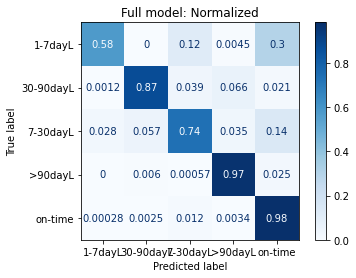

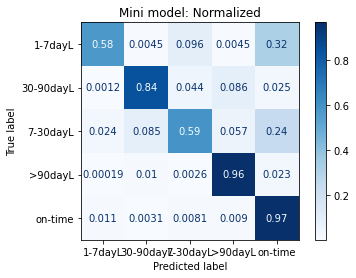

In [12]:
#Plot confusion matricies
#Full
full_confusion = plot_confusion_matrix(rf_model_full, X_test, Y_test,
                      normalize='true', cmap = plt.cm.Blues)
full_confusion.ax_.set_title('Full model: Normalized')
plt.show()

#Mini
mini_confusion = plot_confusion_matrix(rf_model_mini, X_test, Y_test,
                      normalize='true', cmap = plt.cm.Blues)
mini_confusion.ax_.set_title('Mini model: Normalized')
plt.show()

In [13]:
# #pickle models for later prediction
# models = [rf_model_full, rf_model_mini]
# names = ['RF_full', 'RF_mini']

# for i in range(len(models)):
#     with open(names[i] + '.pickle', 'wb') as f:
#         pickle.dump(models[i], f)